# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaing the data
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data
- Observe outliers
- After observing outliers,missing data and duplicates, handle any unclean data.
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
- Add a new column named 'Week number' and discretisize the data into weeks according to the dates.Tip: Change the datatype of the date feature to datetime type instead of object.
- Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
- Identify feature(s) which need normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno as msno
from scipy import stats
from sklearn import preprocessing
import os
import pyarrow as pa
import pyarrow.parquet as pq

# 1 - Extraction

In [2]:
ds = pd.read_csv("1996_Accidents_UK.csv", index_col='accident_index', parse_dates=['date'], infer_datetime_format=True)
ds.head()

accident_year accident_reference  location_easting_osgr  \
accident_index                                                            
1996010SU0970            1996          010SU0970               519190.0   
1996010SU0971            1996          010SU0971               521760.0   
1996010SU0972            1996          010SU0972               512950.0   
1996010SU0973            1996          010SU0973               521650.0   
1996010SU0974            1996          010SU0974               522640.0   

                location_northing_osgr  longitude  latitude  \
accident_index                                                
1996010SU0970                 203270.0        NaN       NaN   
1996010SU0971                 201040.0        NaN       NaN   
1996010SU0972                 197970.0        NaN       NaN   
1996010SU0973                 201270.0        NaN       NaN   
1996010SU0974                 200450.0        NaN       NaN   

                       police_force accident_severity  number_of_vehicles  \
accident_index                                                              
1996010SU0970   Metropolitan Police            Slight                   1   
1996010SU0971   Metropolitan Police            Slight                   2   
1996010SU0972   Metropolitan Police            Slight                   4   
1996010SU0973   Metropolitan Police            Slight                   4   
1996010SU0974   Metropolitan Police            Slight                   4   

                number_of_casualties  ...  \
accident_index                        ...   
1996010SU0970                      1  ...   
1996010SU0971                      1  ...   
1996010SU0972                      1  ...   
1996010SU0973                      1  ...   
1996010SU0974                      1  ...   

                         pedestrian_crossing_physical_facilities  \
accident_index                                                     
1996010SU0970   No physical crossing facilities within 50 metres   
1996010SU0971   No physical crossing facilities within 50 metres   
1996010SU0972   No physical crossing facilities within 50 metres   
1996010SU0973   No physical crossing facilities within 50 metres   
1996010SU0974   No physical crossing facilities within 50 metres   

                      light_conditions     weather_conditions  \
accident_index                                                  
1996010SU0970                 Daylight  Snowing no high winds   
1996010SU0971                 Daylight  Snowing no high winds   
1996010SU0972    Darkness - lights lit     Fine no high winds   
1996010SU0973   Darkness - no lighting     Fine no high winds   
1996010SU0974    Darkness - lights lit   Raining + high winds   

               road_surface_conditions special_conditions_at_site  \
accident_index                                                      
1996010SU0970             Frost or ice                       None   
1996010SU0971              Wet or damp                       None   
1996010SU0972              Wet or damp                       None   
1996010SU0973                      Dry                       None   
1996010SU0974              Wet or damp                       None   

               carriageway_hazards urban_or_rural_area  \
accident_index                                           
1996010SU0970                 None               Rural   
1996010SU0971                 None               Rural   
1996010SU0972                 None               Rural   
1996010SU0973                 None               Rural   
1996010SU0974                 None               Rural   

               did_police_officer_attend_scene_of_accident  \
accident_index                                               
1996010SU0970                 Data missing or out of range   
1996010SU0971                 Data missing or out of range   
1996010SU0972                 Data missing or out of range   
1996010SU0973                 Data missing or out of range

# 2- EDA

In [3]:
ds.describe()

accident_year  location_easting_osgr  location_northing_osgr  \
count       236193.0          235975.000000            2.359750e+05   
mean          1996.0          438948.815892            3.006587e+05   
std              0.0           94591.160455            1.607717e+05   
min           1996.0           74300.000000            8.200000e+03   
25%           1996.0          375400.000000            1.787100e+05   
50%           1996.0          439700.000000            2.675700e+05   
75%           1996.0          522840.000000            3.982850e+05   
max           1996.0          845100.000000            1.198500e+06   

       longitude  latitude  number_of_vehicles  number_of_casualties  \
count        0.0       0.0       236193.000000         236193.000000   
mean         NaN       NaN            1.810049              1.357271   
std          NaN       NaN            0.728938              0.870751   
min          NaN       NaN            1.000000              1.000000   
25%          NaN       NaN            1.000000              1.000000   
50%          NaN       NaN            2.000000              1.000000   
75%          NaN       NaN            2.000000              1.000000   
max          NaN       NaN           34.000000             63.000000   

         speed_limit  lsoa_of_accident_location  
count  236193.000000                   236193.0  
mean       39.278874                       -1.0  
std        14.184979                        0.0  
min         5.000000                       -1.0  
25%        30.000000                       -1.0  
50%        30.000000                       -1.0  
75%        60.000000                       -1.0  
max        70.000000                       -1.0

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236193 entries, 1996010SU0970 to 1996984051296
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   accident_year                                236193 non-null  int64         
 1   accident_reference                           236193 non-null  object        
 2   location_easting_osgr                        235975 non-null  float64       
 3   location_northing_osgr                       235975 non-null  float64       
 4   longitude                                    0 non-null       float64       
 5   latitude                                     0 non-null       float64       
 6   police_force                                 236193 non-null  object        
 7   accident_severity                            236193 non-null  object        
 8   number_of_vehicles                           23619

In [5]:
ds.iloc[0]

accident_year                                                                              1996
accident_reference                                                                    010SU0970
location_easting_osgr                                                                  519190.0
location_northing_osgr                                                                 203270.0
longitude                                                                                   NaN
latitude                                                                                    NaN
police_force                                                                Metropolitan Police
accident_severity                                                                        Slight
number_of_vehicles                                                                            1
number_of_casualties                                                                          1
date                                    

What are the unique values in each column 

In [6]:
for col in ds:
	print("{} {}\n".format(col, ds[col].unique()))

accident_year [1996]

accident_reference ['010SU0970' '010SU0971' '010SU0972' ... '984050896' '984051196'
 '984051296']

location_easting_osgr [519190. 521760. 512950. ... 205600. 221800. 206700.]

location_northing_osgr [203270. 201040. 197970. ... 596800. 611600. 610500.]

longitude [nan]

latitude [nan]

police_force ['Metropolitan Police' 'City of London' 'Cumbria' 'Lancashire'
 'Merseyside' 'Greater Manchester' 'Cheshire' 'Northumbria' 'Durham'
 'North Yorkshire' 'West Yorkshire' 'South Yorkshire' 'Humberside'
 'Cleveland' 'West Midlands' 'Staffordshire' 'West Mercia' 'Warwickshire'
 'Derbyshire' 'Nottinghamshire' 'Lincolnshire' 'Leicestershire'
 'Northamptonshire' 'Cambridgeshire' 'Norfolk' 'Suffolk' 'Bedfordshire'
 'Hertfordshire' 'Essex' 'Thames Valley' 'Hampshire' 'Surrey' 'Kent'
 'Sussex' 'Devon and Cornwall' 'Avon and Somerset' 'Gloucestershire'
 'Wiltshire' 'Dorset' 'North Wales' 'Gwent' 'South Wales' 'Dyfed-Powys'
 'Northern' 'Grampian' 'Tayside' 'Fife' 'Lothian and Border

How many unique values are there in each column?

<BarContainer object of 35 artists>

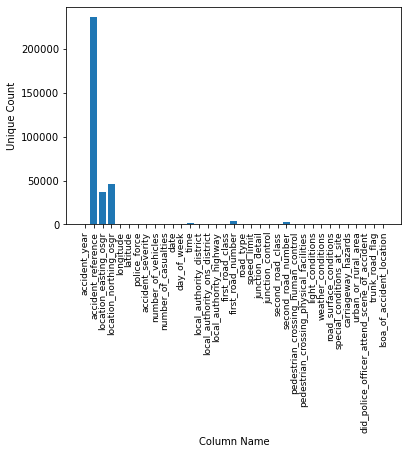

In [7]:
# for column in ds:
#     print("{} {}".format(column,ds[column].unique().size))
df_col_unique = pd.DataFrame(columns=['unique_count'])
for column in ds.columns:
    df_col_unique.loc[column] = {"unique_count":ds[column].unique().size}

plt.xlabel("Column Name")
plt.ylabel("Unique Count")
# ax = sns.barplot(x=df_col_unique.unique_count,y=df_col_unique.index)
# ax.set_yticklabels(ax.get_yticklabels(), rotation=0,fontsize=8, ha="right")

plt.xticks(rotation=90,fontsize=9)
plt.bar(df_col_unique.index,df_col_unique.unique_count)

Let's try semilogy plot to better see the smaller values

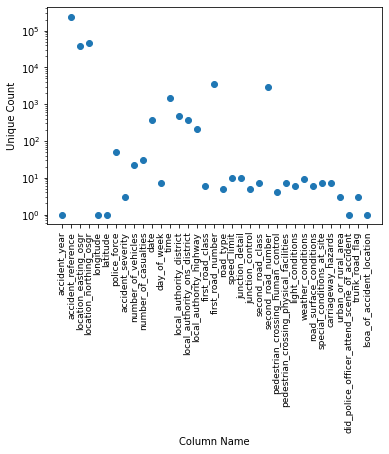

In [8]:
plt.xticks(rotation=90)
plt.ylabel("Unique Count")
plt.xlabel("Column Name")
plt.xticks(fontsize=9)
plt.semilogy(df_col_unique.unique_count,'o')

What are the Top 10 districts in terms of the number of accidents recorded

<AxesSubplot:title={'center':'Top 10 Districts with most accidents'}, xlabel='District', ylabel='Accident Count'>

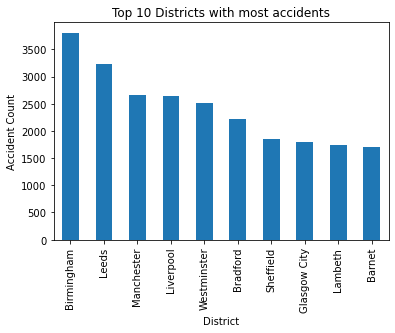

In [9]:
ds.groupby(['local_authority_district']).count()['accident_year'].sort_values(ascending=False).head(10).plot(kind='bar', ylabel="Accident Count", xlabel="District", title="Top 10 Districts with most accidents")

Which districts named/represented as numbers?

In [10]:
ds[ds.local_authority_district.str.contains('[0-9]+')]['local_authority_district'].unique()

array(['272', '275', '271', '534', '537', '550', '553', '806', '803',
       '804', '801', '802', '810', '809', '808', '813', '812', '816',
       '814', '815', '817', '818', '819', '822', '821', '823', '824',
       '827', '831', '825', '830', '828', '826', '829', '833', '835',
       '834', '836', '839', '840', '841', '847', '849', '838', '837',
       '843', '842', '844', '846', '845', '848', '853', '854', '851',
       '852', '850', '856', '857', '858', '859'], dtype=object)

Which day of the week had the most recorded accidents?

<AxesSubplot:xlabel='Week Day', ylabel='Recorded Accidents'>

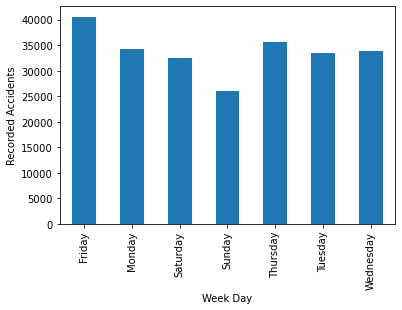

In [11]:
ds.groupby(['day_of_week']).count()['accident_year'].plot(ylabel='Recorded Accidents', xlabel='Week Day', kind='bar')

Which hour of the day had the most recorded accidents?


<AxesSubplot:xlabel='Hour', ylabel='Recorded Accidents'>

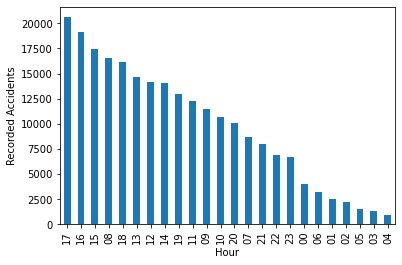

In [12]:
ds.apply(lambda x: re.findall(r"([0-9]+):.+", x.time)[0], axis = 1).value_counts().plot(kind='bar', ylabel='Recorded Accidents', xlabel='Hour')

Which light conditions had the most recorded accidents?

<AxesSubplot:xlabel='light_conditions', ylabel='count'>

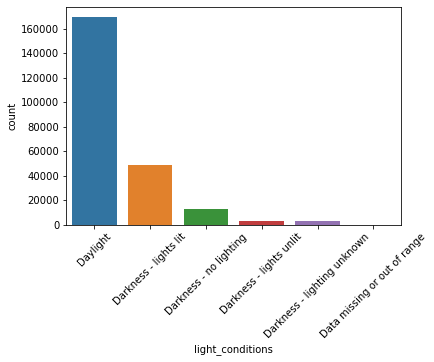

In [13]:
plt.xticks(rotation=45)
sns.countplot(x='light_conditions', data=ds)

At which speed limits had the most recorded accidents?

<AxesSubplot:xlabel='speed_limit', ylabel='Density'>

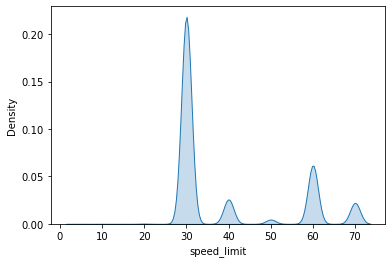

In [14]:
# sns.countplot(x='speed_limit', data=ds)
sns.kdeplot(ds.speed_limit, shade=True)

What is the road type that is associated with the most recorded accidents?

<AxesSubplot:xlabel='road_type', ylabel='count'>

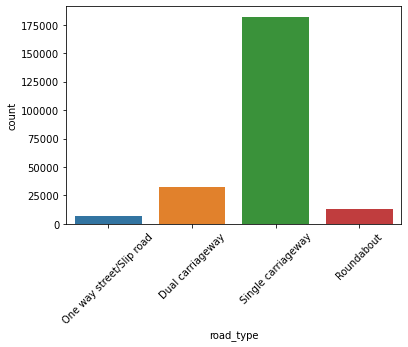

In [15]:
plt.xticks(rotation=45)
sns.countplot(x='road_type', data=ds)

Which Road class had the most recorded accidents?

In [16]:
ds.first_road_class.value_counts()

A               108803
Unclassified     68560
B                29720
C                21323
Motorway          7327
A(M)               460
Name: first_road_class, dtype: int64

Which junction type is associated with the most recorded accidents?

In [17]:
ds.junction_detail.value_counts()

Not at junction or within 20 metres    90219
T or staggered junction                80405
Crossroads                             25685
Roundabout                             16209
Private drive or entrance              10383
Other junction                          5082
More than 4 arms (not roundabout)       3330
Slip road                               3062
Mini-roundabout                         1808
Data missing or out of range              10
Name: junction_detail, dtype: int64

Which surface condition had the most recorded accidents?

In [18]:
ds.road_surface_conditions.value_counts()

Dry                             154414
Wet or damp                      73175
Frost or ice                      5370
Snow                              2796
Flood over 3cm. deep               226
Data missing or out of range       212
Name: road_surface_conditions, dtype: int64

Correlation between the number_of_casualties and the serverity of the accident?

In [19]:
ds.groupby(['accident_severity'])['number_of_casualties'].sum() 

accident_severity
Fatal        6738
Serious     59045
Slight     254795
Name: number_of_casualties, dtype: int64

In [20]:
ds.accident_severity.value_counts()

Slight     195592
Serious     37327
Fatal        3274
Name: accident_severity, dtype: int64

Casualties per accedent in each severity

In [21]:
ds.groupby(['accident_severity'])['number_of_casualties'].sum()  / ds.accident_severity.value_counts()

Fatal      2.058033
Serious    1.581831
Slight     1.302686
dtype: float64

Is there's a correlation between the remaining numerical columns

C:\Users\dahom\AppData\Local\Temp\ipykernel_11892\1007556813.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

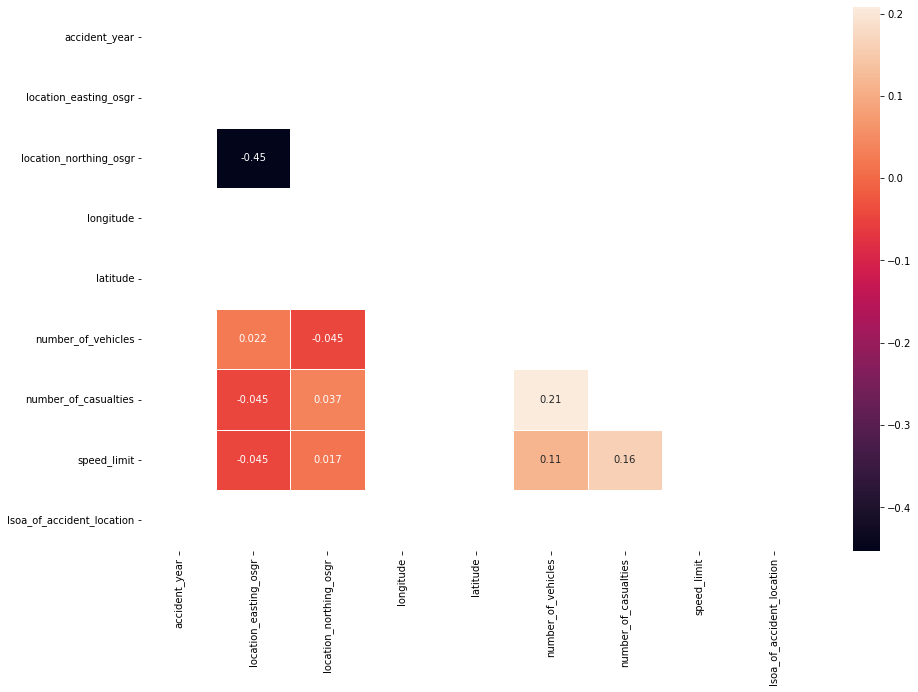

In [22]:
plt.figure(figsize=(15,10))
corr=ds.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, linewidths=.5,annot=True,mask=mask)

We can observe that the `number_of_casualties` is correlated with both `number_of_vehicles` and the `speed_limit`. And the `number_of_vehicles` is correlated with the `speed_limit`.

In [23]:
ds.corr().unstack().sort_values().drop_duplicates()

location_easting_osgr   location_northing_osgr   -0.452460
location_northing_osgr  number_of_vehicles       -0.045437
location_easting_osgr   number_of_casualties     -0.044947
speed_limit             location_easting_osgr    -0.044912
                        location_northing_osgr    0.017062
number_of_vehicles      location_easting_osgr     0.022276
location_northing_osgr  number_of_casualties      0.037252
number_of_vehicles      speed_limit               0.113240
speed_limit             number_of_casualties      0.160143
number_of_vehicles      number_of_casualties      0.207989
location_easting_osgr   location_easting_osgr     1.000000
accident_year           accident_year                  NaN
dtype: float64

# 3 - Cleaning Data

## Observing Missing and duplicate Data

What columns contains missing values

In [24]:
ds.isnull().mean().sort_values(ascending=False)*100

longitude                                      100.000000
latitude                                       100.000000
second_road_number                              38.666260
weather_conditions                               1.127044
road_type                                        0.605014
location_easting_osgr                            0.092297
location_northing_osgr                           0.092297
accident_year                                    0.000000
second_road_class                                0.000000
pedestrian_crossing_human_control                0.000000
pedestrian_crossing_physical_facilities          0.000000
light_conditions                                 0.000000
special_conditions_at_site                       0.000000
road_surface_conditions                          0.000000
junction_detail                                  0.000000
carriageway_hazards                              0.000000
urban_or_rural_area                              0.000000
did_police_off

## Handling Duplicate Data

In [25]:
print("Toal number of records in our data set: ", ds.shape[0], '\n')

print("The column named 'lsoa_of_accident_location' seams to only have -1 values, is it? \n", ds.lsoa_of_accident_location.value_counts())
print()
print("The column named 'did_police_officer_attend_scene_of_accident' all missing? \n", ds.did_police_officer_attend_scene_of_accident.value_counts())

Toal number of records in our data set:  236193 

The column named 'lsoa_of_accident_location' seams to only have -1 values, is it? 
 -1    236193
Name: lsoa_of_accident_location, dtype: int64

The column named 'did_police_officer_attend_scene_of_accident' all missing? 
 Data missing or out of range    236193
Name: did_police_officer_attend_scene_of_accident, dtype: int64


We will drop the following columns:
* `accident_year` and `accident_reference`, because `accident_index` has them combined, and uniquely identifies the record.
* `lsoa_of_accident_location` all of its values are -1, not a useful column.
* `did_police_officer_attend_scene_of_accident` all of its values are missing, not a useful column.

In [26]:
ds.drop(['accident_year','accident_reference','lsoa_of_accident_location','did_police_officer_attend_scene_of_accident','longitude', 'latitude'], axis=1, inplace=True)

## Handling Missing data

In [27]:
ColumnsContainDataMissing = [
'pedestrian_crossing_human_control',
'pedestrian_crossing_physical_facilities',
'light_conditions',
'road_surface_conditions',
'special_conditions_at_site',
'carriageway_hazards',
'trunk_road_flag',
'junction_control',
'junction_detail'
]
ds[ColumnsContainDataMissing] = ds[ColumnsContainDataMissing].replace('Data missing or out of range', np.NaN)

ColumnsContainNegOne = [
	'second_road_class',
	'local_authority_ons_district',
	'local_authority_highway'
]
ds[ColumnsContainNegOne] = ds[ColumnsContainNegOne].replace('-1', np.NaN)


# Replace the roads which have no numbers with string "0" in second_road_number and first_road_number, later will be converted to numeric integer
ColumnsToReplace = ["second_road_number", "first_road_number"]
ds[ColumnsToReplace] = ds[ColumnsToReplace].replace("first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ", "0")


In [28]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236193 entries, 1996010SU0970 to 1996984051296
Data columns (total 29 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   location_easting_osgr                    235975 non-null  float64       
 1   location_northing_osgr                   235975 non-null  float64       
 2   police_force                             236193 non-null  object        
 3   accident_severity                        236193 non-null  object        
 4   number_of_vehicles                       236193 non-null  int64         
 5   number_of_casualties                     236193 non-null  int64         
 6   date                                     236193 non-null  datetime64[ns]
 7   day_of_week                              236193 non-null  object        
 8   time                                     236193 non-null  object        
 9   local_author

In [29]:
# Percentage of values missing in each column
col_perc_missing = ds.isnull().mean().sort_values(ascending=False)*100
col_perc_missing

second_road_number                         38.666260
second_road_class                          38.666260
junction_control                           38.333905
trunk_road_flag                            11.238690
local_authority_highway                     1.921733
local_authority_ons_district                1.369643
weather_conditions                          1.127044
road_type                                   0.605014
location_easting_osgr                       0.092297
location_northing_osgr                      0.092297
road_surface_conditions                     0.089757
carriageway_hazards                         0.035988
pedestrian_crossing_human_control           0.034717
pedestrian_crossing_physical_facilities     0.034717
special_conditions_at_site                  0.026673
junction_detail                             0.004234
light_conditions                            0.000423
urban_or_rural_area                         0.000000
police_force                                0.

Remove rows with missing values that represent less than 2% of the data

In [30]:
for columnName in col_perc_missing.index:
	if col_perc_missing[columnName] < 2:
		ds.dropna(subset=[columnName], inplace=True)

In [31]:
# After Removing
ds.isnull().mean().sort_values(ascending=False)*100

second_road_number                         38.431319
second_road_class                          38.431319
junction_control                           38.086419
trunk_road_flag                            10.130569
speed_limit                                 0.000000
urban_or_rural_area                         0.000000
carriageway_hazards                         0.000000
special_conditions_at_site                  0.000000
road_surface_conditions                     0.000000
weather_conditions                          0.000000
light_conditions                            0.000000
pedestrian_crossing_physical_facilities     0.000000
pedestrian_crossing_human_control           0.000000
junction_detail                             0.000000
location_easting_osgr                       0.000000
location_northing_osgr                      0.000000
first_road_number                           0.000000
first_road_class                            0.000000
local_authority_highway                     0.

<AxesSubplot:>

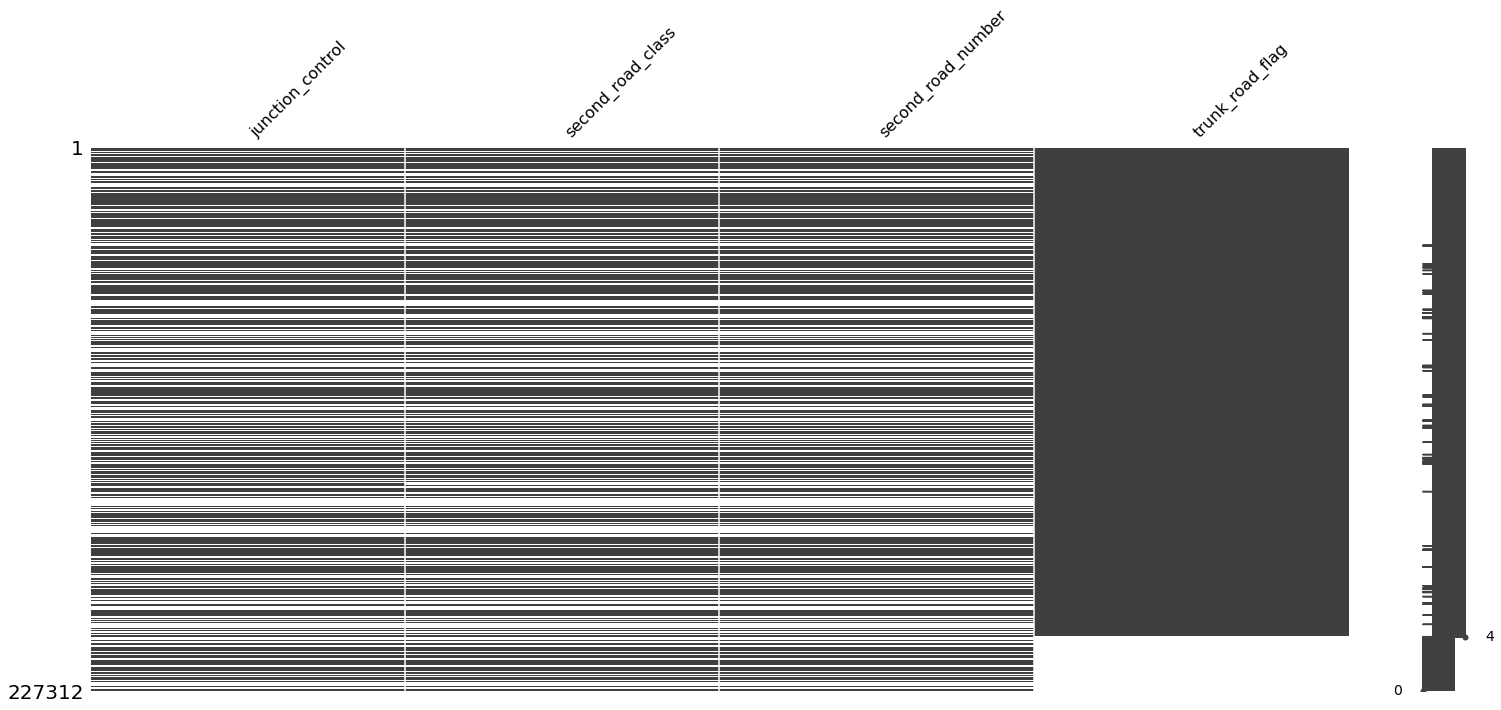

In [32]:
df_missingdata = ds.columns[ds.isnull().any()].tolist()
msno.matrix(ds[df_missingdata])

As you can see from the graph above, we have missing values in these columns (`junction_control`, `second_road_class`, `second_road_nuber`, `trunk_road_flag`).<br/><br/>
The columns `second_road_class`, `second_road_number` and `junction_control` are Missing At Random (MAR), since some accedients fully occures in a single road thus `second_road_number`, `second_road_class` and `junction_control` will naturally be missing.<br/>
We will encode this missingness by `Not Available` category later with the Encoding step.

`trunk_road_flag` contain missing values in the lower 11% of the records, this may indicate that this column got corrupted or part of it was deleted. We'll assume it's missing completely at random MCAR and will encode its missing values as `Not Available`.

## Findings and conclusions

Stated Above

## Observing outliers

In [33]:
columns_numerical = ds.select_dtypes(include=np.number).columns
columns_numerical

Index(['location_easting_osgr', 'location_northing_osgr', 'number_of_vehicles',
       'number_of_casualties', 'speed_limit'],
      dtype='object')

c:\Users\dahom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dahom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dahom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dahom\anaconda3\lib\si

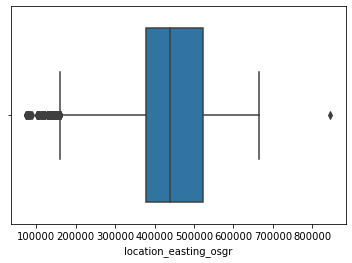

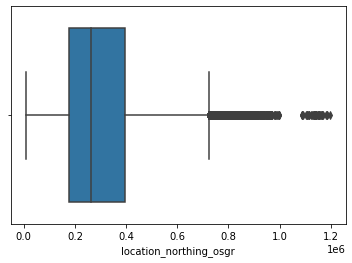

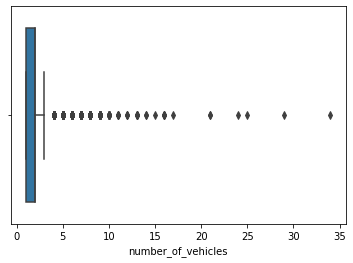

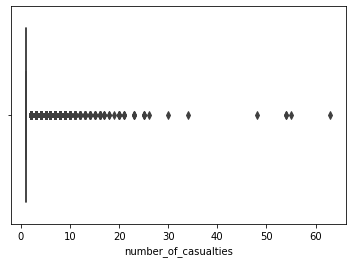

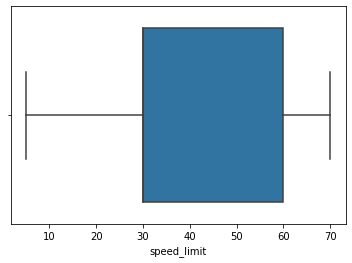

In [34]:
for i, colname in enumerate(columns_numerical):
	plt.figure(i)
	sns.boxplot(ds[colname])

## Handling outliers

IQR Method

In [35]:
for colname in columns_numerical:
	Q1 = ds[colname].quantile(0.25)
	Q3 = ds[colname].quantile(0.75)
	IQR = Q3 - Q1
	cut_off = IQR * 1.5
	lower = Q1 - cut_off
	upper =  Q3 + cut_off
	print("Column {}, lower {}, upper {}".format(colname, lower, upper))

	df1 = ds[colname][ds[colname] >= upper]
	df2 = ds[colname][ds[colname] <= lower]
	df3 = ds[(ds[colname] <= upper) & (ds[colname] >= lower)]

	count_recods = ds.shape[0]
	count_removed = count_recods - df3.shape[0] 

	print('Number of outliers \t{} \t{}%'.format(count_removed, round((count_removed)*100 /ds.shape[0], 2) ))
	print()

	# ds = ds[(ds[colname] <= upper) & (ds[colname] >= lower)]	

Column location_easting_osgr, lower 161626.25, upper 739156.25
Number of outliers 	383 	0.17%

Column location_northing_osgr, lower -148550.0, upper 723530.0
Number of outliers 	2822 	1.24%

Column number_of_vehicles, lower -0.5, upper 3.5
Number of outliers 	4905 	2.16%

Column number_of_casualties, lower 1.0, upper 1.0
Number of outliers 	53266 	23.43%

Column speed_limit, lower -15.0, upper 105.0
Number of outliers 	0 	0.0%



We will use another method to remove the outliers, since the IQR method will remove around 25% of the total rows.

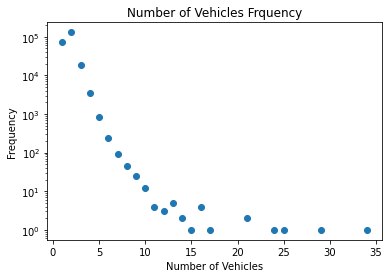

In [36]:
plt.title('Number of Vehicles Frquency')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.semilogy(ds.number_of_vehicles.value_counts(), 'o')

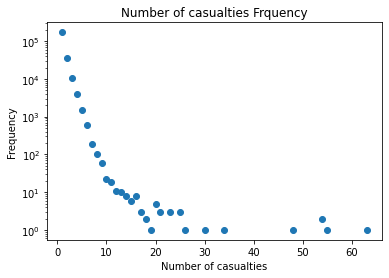

In [37]:
plt.title('Number of casualties Frquency')
plt.xlabel('Number of casualties')
plt.ylabel('Frequency')
plt.semilogy(ds.number_of_casualties.value_counts(), 'o')

We will consider values above 4 std from the numerical columns, as outliers and remove them using the z-score method.

In [38]:
for colname in columns_numerical:
	z = np.abs(stats.zscore(ds[colname]))
	count_recods = ds.shape[0]
	count_removed = ds[z >= 4].shape[0]
	# remove outliers above 4 standard deviations
	ds = ds[z < 4]
	print( "{} \t to be removed \t{} \t{}%".format(colname, count_removed, round((count_removed)*100 /ds.shape[0], 2) ))
	print()


location_easting_osgr 	 to be removed 	1 	0.0%

location_northing_osgr 	 to be removed 	153 	0.07%

number_of_vehicles 	 to be removed 	1303 	0.58%

number_of_casualties 	 to be removed 	2385 	1.07%

speed_limit 	 to be removed 	0 	0.0%



Lets see the box plots after removal of outliers

c:\Users\dahom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dahom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dahom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dahom\anaconda3\lib\si

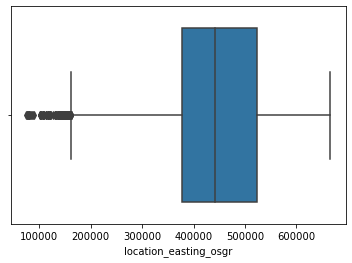

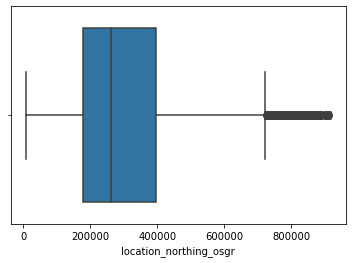

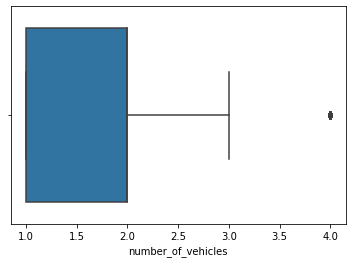

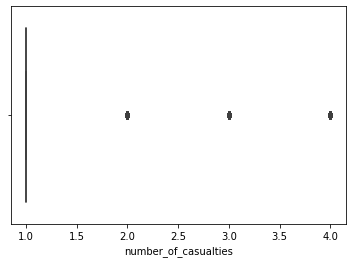

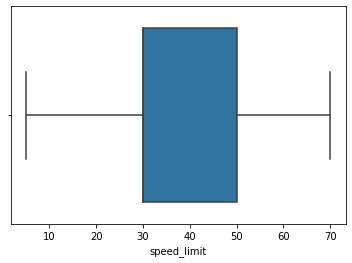

In [39]:
for i, colname in enumerate(columns_numerical):
	plt.figure(i)
	sns.boxplot(ds[colname])

## Findings and conclusions

Stated above

# 4 - Data transformation

Fix the data types of the columns

In [40]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223470 entries, 1996010SU0970 to 1996984051196
Data columns (total 29 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   location_easting_osgr                    223470 non-null  float64       
 1   location_northing_osgr                   223470 non-null  float64       
 2   police_force                             223470 non-null  object        
 3   accident_severity                        223470 non-null  object        
 4   number_of_vehicles                       223470 non-null  int64         
 5   number_of_casualties                     223470 non-null  int64         
 6   date                                     223470 non-null  datetime64[ns]
 7   day_of_week                              223470 non-null  object        
 8   time                                     223470 non-null  object        
 9   local_author

Convert column `first_road_number` and `second_road_number` to a numeric datatype.<br/>
Convert column `time` into timedelta datatype

In [41]:
ds['first_road_number'] = pd.to_numeric(ds['first_road_number'], errors='coerce')
ds['second_road_number'] = pd.to_numeric(ds['second_road_number'], errors='coerce')
#
ds['time'] = pd.to_timedelta(ds['time'] + ":00")

In [42]:
columns_numerical = ds.select_dtypes(include=np.number).columns
columns_numerical

Index(['location_easting_osgr', 'location_northing_osgr', 'number_of_vehicles',
       'number_of_casualties', 'time', 'first_road_number', 'speed_limit',
       'second_road_number'],
      dtype='object')

## 4.1 - Discretization

Add a new column for the `week_number`

In [43]:
# ds['week_number'] = ds['date'].dt.isocalendar().week
ds['week_number'] = ds['date'].dt.strftime('%U').to_numpy().astype(int)

In [44]:
df_week_start_end = ds.groupby('week_number').agg({'date': ['min', 'max']})

df_week_start_end.columns = ['week_start', 'week_end']
df_week_start_end.to_csv('week_start_end.csv')

# add to the dataset

ds = ds.reset_index().merge(df_week_start_end, on='week_number', how='left').set_index('accident_index')
# pd.merge(ds, df_week_start_end, on='week_number', how='left')
df_week_start_end

week_start   week_end
week_number                      
0           1996-01-01 1996-01-06
1           1996-01-07 1996-01-13
2           1996-01-14 1996-01-20
3           1996-01-21 1996-01-27
4           1996-01-28 1996-02-03
5           1996-02-04 1996-02-10
6           1996-02-11 1996-02-17
7           1996-02-18 1996-02-24
8           1996-02-25 1996-03-02
9           1996-03-03 1996-03-09
10          1996-03-10 1996-03-16
11          1996-03-17 1996-03-23
12          1996-03-24 1996-03-30
13          1996-03-31 1996-04-06
14          1996-04-07 1996-04-13
15          1996-04-14 1996-04-20
16          1996-04-21 1996-04-27
17          1996-04-28 1996-05-04
18          1996-05-05 1996-05-11
19          1996-05-12 1996-05-18
20          1996-05-19 1996-05-25
21          1996-05-26 1996-06-01
22          1996-06-02 1996-06-08
23          1996-06-09 1996-06-15
24          1996-06-16 1996-06-22
25          1996-06-23 1996-06-29
26          1996-06-30 1996-07-06
27          1996-07-07 1996-07-13
28          1996-07-14 1996-07-20
29          1996-07-21 1996-07-27
30          1996-07-28 1996-08-03
31          1996-08-04 1996-08-10
32          1996-08-11 1996-08-17
33          1996-08-18 1996-08-24
34          1996-08-25 1996-08-31
35          1996-09-01 1996-09-07
36          1996-09-08 1996-09-14
37          1996-09-15 1996-09-21
38          1996-09-22 1996-09-28
39          1996-09-29 1996-10-05
40          1996-10-06 1996-10-12
41          1996-10-13 1996-10-19
42          1996-10-20 1996-10-26
43          1996-10-27 1996-11-02
44          1996-11-03 1996-11-09
45          1996-11-10 1996-11-16
46          1996-11-17 1996-11-23
47          1996-11-24 1996-11-30
48          1996-12-01 1996-12-07
49          1996-12-08 1996-12-14
50          1996-12-15 1996-12-21
51          1996-12-22 1996-12-28
52          1996-12-29 1996-12-31

## 4.11 - Findings and conclusions

Stated Above

## 4.2 - Encoding

In [45]:
# Method to apply 1 hot encoding, However not used subsequently.
def one_hot_encode(df, column):
	dummies = pd.get_dummies(df[column], prefix=column, drop_first=False)
	df = pd.concat([df, dummies], axis=1)
	df.drop(column, axis=1, inplace=True)
	return df

In [46]:
# encodes a given column with a given maping dictionary for example: {'tokyo': 1, 'paris': 2, 'amsterdam': 3}
def ordinalLabelEncoder(df, columnName, mapping):
	df[columnName] = df[columnName].map(mapping, na_action='ignore')

# data = pd.DataFrame(columns=['city'], data=["tokyo", "paris", "paris",  "amsterdam"])
# mapping = {'tokyo': 0, 'paris': 1, 'amsterdam': 2}
# ordinalLabelEncoder(data, 'city', mapping)

# data

In [47]:

# returns a data frame of the mappings, label and the coded value
def mapping_to_df(mapping):
	df = pd.DataFrame(columns=['Code'], data=mapping.values())
	df.index = mapping.keys()
	return df

# mapping = {'Slight': 0, 'Serious': 1, 'Fatal': 2}
# mapping_to_df(mapping ).to_csv('accident_severity.csv')

Create a folder to store the encoded labels csv files

In [48]:
path_encoding_labels = 'encoding_labels/'
if not os.path.exists(path_encoding_labels):
	os.mkdir(path_encoding_labels)

How many categories in each categorical column

In [49]:
ds.select_dtypes(include='object').nunique().sort_values(ascending=False)

local_authority_district                   408
local_authority_ons_district               377
local_authority_highway                    207
police_force                                51
junction_detail                              9
weather_conditions                           8
day_of_week                                  7
pedestrian_crossing_physical_facilities      6
carriageway_hazards                          6
special_conditions_at_site                   6
second_road_class                            6
first_road_class                             6
light_conditions                             5
road_surface_conditions                      5
junction_control                             4
road_type                                    4
pedestrian_crossing_human_control            3
accident_severity                            3
urban_or_rural_area                          3
trunk_road_flag                              2
dtype: int64

We'll not use One hot encoding, since the number of categories is very large.

Encode categorical columns as numbers using Label encoding

In [50]:
ordinal_custom_mapping = {
    'accident_severity': {'Slight': 0, 'Serious': 1, 'Fatal': 2},
    'day_of_week': {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6},
}

for colname in ordinal_custom_mapping:
    ordinalLabelEncoder(ds, colname, ordinal_custom_mapping[colname])
    # Save lookup tables
    mapping_to_df(ordinal_custom_mapping[colname]).to_csv(path_encoding_labels + colname + '.csv')


In [51]:
columns_categorical = ds.select_dtypes('object').columns
columns_categorical

Index(['police_force', 'local_authority_district',
       'local_authority_ons_district', 'local_authority_highway',
       'first_road_class', 'road_type', 'junction_detail', 'junction_control',
       'second_road_class', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'trunk_road_flag'],
      dtype='object')

Fill null values of numerical columns with -1
<br/>
Fill null values of categorical columns with `Not Available`

In [52]:
for colname in columns_numerical:
	if(ds[colname].isnull().sum() > 0): # this skips the Time column, eventhough it does not have any null values
		ds[colname] = ds[colname].fillna(-1)
# ds[columns_numerical] = ds[columns_numerical].fillna(-1)

In [53]:
# columns which contain nulls
df_missingdata = ds.columns[ds.isnull().any()].tolist()
print(df_missingdata)
# fill missing values with 'Not Available'
# ds[df_missingdata] = ds[df_missingdata].fillna('Not Available')
ds[columns_categorical] = ds[columns_categorical].fillna('Not Available')

['junction_control', 'second_road_class', 'trunk_road_flag']


In [54]:
from IPython.display import display, HTML


for column in columns_categorical:
    if(column in ordinal_custom_mapping): continue # skip ordinal columns, they are already encoded

    # ds[column] = preprocessing.LabelEncoder().fit_transform(ds[column])    
    encoder = preprocessing.LabelEncoder()


    ds[column] = encoder.fit_transform(ds[column])    

    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    # print(mapping)
    df_labels = mapping_to_df(mapping)
    df_labels.to_csv(path_encoding_labels + column + '.csv')
    
    print(column)
    display(df_labels)


police_force


Code
Avon and Somerset         0
Bedfordshire              1
Cambridgeshire            2
Central                   3
Cheshire                  4
City of London            5
Cleveland                 6
Cumbria                   7
Derbyshire                8
Devon and Cornwall        9
Dorset                   10
Dumfries and Galloway    11
Durham                   12
Dyfed-Powys              13
Essex                    14
Fife                     15
Gloucestershire          16
Grampian                 17
Greater Manchester       18
Gwent                    19
Hampshire                20
Hertfordshire            21
Humberside               22
Kent                     23
Lancashire               24
Leicestershire           25
Lincolnshire             26
Lothian and Borders      27
Merseyside               28
Metropolitan Police      29
Norfolk                  30
North Wales              31
North Yorkshire          32
Northamptonshire         33
Northern                 34
Northumbria              35
Nottinghamshire          36
South Wales              37
South Yorkshire          38
Staffordshire            39
Strathclyde              40
Suffolk                  41
Surrey                   42
Sussex                   43
Tayside                  44
Thames Valley            45
Warwickshire             46
West Mercia              47
West Midlands            48
West Yorkshire           49
Wiltshire                50

local_authority_district


Code
271             0
272             1
275             2
534             3
537             4
...           ...
Wychavon      403
Wycombe       404
Wyre          405
Wyre Forest   406
York          407

[408 rows x 1 columns]

local_authority_ons_district


Code
Aberdeen City     0
Aberdeenshire     1
Adur              2
Allerdale         3
Amber Valley      4
...             ...
Wychavon        372
Wycombe         373
Wyre            374
Wyre Forest     375
York            376

[377 rows x 1 columns]

local_authority_highway


Code
Aberdeen City            0
Aberdeenshire            1
Angus                    2
Argyll & Bute            3
Barking and Dagenham     4
...                    ...
Wokingham              202
Wolverhampton          203
Worcestershire         204
Wrexham                205
York                   206

[207 rows x 1 columns]

first_road_class


Code
A                0
A(M)             1
B                2
C                3
Motorway         4
Unclassified     5

road_type


Code
Dual carriageway             0
One way street/Slip road     1
Roundabout                   2
Single carriageway           3

junction_detail


Code
Crossroads                              0
Mini-roundabout                         1
More than 4 arms (not roundabout)       2
Not at junction or within 20 metres     3
Other junction                          4
Private drive or entrance               5
Roundabout                              6
Slip road                               7
T or staggered junction                 8

junction_control


Code
Authorised person            0
Auto traffic signal          1
Give way or uncontrolled     2
Not Available                3
Stop sign                    4

second_road_class


Code
A                 0
A(M)              1
B                 2
C                 3
Motorway          4
Not Available     5
Unclassified      6

pedestrian_crossing_human_control


Code
Control by other authorised person     0
Control by school crossing patrol      1
None within 50 metres                  2

pedestrian_crossing_physical_facilities


Code
Central refuge                                         0
Footbridge or subway                                   1
No physical crossing facilities within 50 metres       2
Pedestrian phase at traffic signal junction            3
Pelican, puffin, toucan or similar non-junction...     4
Zebra                                                  5

light_conditions


Code
Darkness - lighting unknown     0
Darkness - lights lit           1
Darkness - lights unlit         2
Darkness - no lighting          3
Daylight                        4

weather_conditions


Code
Fine + high winds         0
Fine no high winds        1
Fog or mist               2
Other                     3
Raining + high winds      4
Raining no high winds     5
Snowing + high winds      6
Snowing no high winds     7

road_surface_conditions


Code
Dry                      0
Flood over 3cm. deep     1
Frost or ice             2
Snow                     3
Wet or damp              4

special_conditions_at_site


Code
Auto signal part defective                     0
Auto traffic signal - out                      1
None                                           2
Road sign or marking defective or obscured     3
Road surface defective                         4
Roadworks                                      5

carriageway_hazards


Code
Dog on road              0
None                     1
Other animal on road     2
Other object on road     3
Previous accident        4
Vehicle load on road     5

urban_or_rural_area


Code
Rural           0
Unallocated     1
Urban           2

trunk_road_flag


Code
Non-trunk                                     0
Not Available                                 1
Trunk (Roads managed by Highways England)     2

## 4.22 - Findings and conlcusions

Stated Above

## 4.3 - Normalisation 

From our point of view, there's no need to normalise any column.<br/>
Normalisation is done when you need to compare the values, but here we don't compare anything.

In [55]:
columns_numerical

Index(['location_easting_osgr', 'location_northing_osgr', 'number_of_vehicles',
       'number_of_casualties', 'time', 'first_road_number', 'speed_limit',
       'second_road_number'],
      dtype='object')

## 4.31 - Findings and conclusions

Stated Above

## 4.4 - Adding more columns

In [56]:
# Sunday encoede as 6
# Saturday encoede as 5
ds['is_weekend'] = ds.apply(lambda x: 1 if x.day_of_week in [5, 6] else 0, axis = 1)
# ds['is_weekend'] = ds.apply(lambda x: 1 if x.day_of_week in ['Sunday', 'Saturday'] else 0, axis = 1)

In [57]:
# second_road_class Not Availble encode as 5
ds['two_roads_accident'] = ds.apply(lambda x: 0 if x['second_road_class'] == 5 else 1,  axis = 1)
# ds['two_roads_accident'] = ds.apply(lambda x: 0 if pd.isnull(x['second_road_class']) else 1,  axis = 1)

## 4.41 - Findings and concluisons

In [58]:
# 0 is false, 1 is true
ds.is_weekend.value_counts()

0    168489
1     54981
Name: is_weekend, dtype: int64

In [59]:
# 0 is false, 1 is true
ds.two_roads_accident.value_counts()

1    138269
0     85201
Name: two_roads_accident, dtype: int64

More accidents happened on two streets than a single street. And more accidents happened on days that are not week end days

## 4.5 - Csv file for lookup

Done in the steps above

## 5- Exporting the dataframe to a csv file or parquet

In [60]:
ds.info()
ds.to_parquet('final_dataframe.parquet.gzip', compression='gzip')

<class 'pandas.core.frame.DataFrame'>
Index: 223470 entries, 1996010SU0970 to 1996984051196
Data columns (total 34 columns):
 #   Column                                   Non-Null Count   Dtype          
---  ------                                   --------------   -----          
 0   location_easting_osgr                    223470 non-null  float64        
 1   location_northing_osgr                   223470 non-null  float64        
 2   police_force                             223470 non-null  int32          
 3   accident_severity                        223470 non-null  int64          
 4   number_of_vehicles                       223470 non-null  int64          
 5   number_of_casualties                     223470 non-null  int64          
 6   date                                     223470 non-null  datetime64[ns] 
 7   day_of_week                              223470 non-null  int64          
 8   time                                     223470 non-null  timedelta64[ns]
 9   l

In [61]:
pd.read_parquet('final_dataframe.parquet.gzip')

location_easting_osgr  location_northing_osgr  police_force  \
accident_index                                                                
1996010SU0970                519190.0                203270.0            29   
1996010SU0971                521760.0                201040.0            29   
1996010SU0972                512950.0                197970.0            29   
1996010SU0973                521650.0                201270.0            29   
1996010SU0974                522640.0                200450.0            29   
...                               ...                     ...           ...   
1996984049796                306800.0                604400.0            11   
1996984049996                315800.0                578300.0            11   
1996984050496                314800.0                575300.0            11   
1996984050896                311900.0                585800.0            11   
1996984051196                303800.0                610500.0            11   

                accident_severity  number_of_vehicles  number_of_casualties  \
accident_index                                                                
1996010SU0970                   0                   1                     1   
1996010SU0971                   0                   2                     1   
1996010SU0972                   0                   4                     1   
1996010SU0973                   0                   4                     1   
1996010SU0974                   0                   4                     1   
...                           ...                 ...                   ...   
1996984049796                   2                   2                     2   
1996984049996                   1                   1                     1   
1996984050496                   0                   2                     2   
1996984050896                   0                   2                     1   
1996984051196                   1                   1                     3   

                     date  day_of_week            time  \
accident_index                                           
1996010SU0970  1996-12-27            4 0 days 07:45:00   
1996010SU0971  1996-12-27            4 0 days 14:18:00   
1996010SU0972  1996-12-13            4 0 days 20:00:00   
1996010SU0973  1996-11-15            4 0 days 17:03:00   
1996010SU0974  1996-11-19            1 0 days 18:00:00   
...                   ...          ...             ...   
1996984049796  1996-12-18            2 0 days 11:40:00   
1996984049996  1996-12-22            6 0 days 09:50:00   
1996984050496  1996-12-20            4 0 days 08:35:00   
1996984050896  1996-12-22            6 0 days 22:20:00   
1996984051196  1996-12-22            6 0 days 10:20:00   

                local_authority_district  ...  road_surface_conditions  \
accident_index                            ...                            
1996010SU0970                        166  ...                        2   
1996010SU0971                        166  ...                        4   
1996010SU0972                        166  ...                        4   
1996010SU0973                        166  ...                        0   
1996010SU0974                        166  ...                        4   
...                                  ...  ...                      ...   
1996984049796                        106  ...                        4   
1996984049996                        106  ...                        2   
1996984050496                        106  ...                        4   
1996984050896                        106  ...                        4   
1996984051196                        106  ...                        2   

                special_conditions_at_site  carriageway_hazards  \
accident_index                                                    
1996010SU0970                            2                    1   
1996010SU0971                            

In [62]:
ds.to_csv('final_dataframe.csv')

# Milestone 2

* The external data was obtained from the original source of the dataset (road accident safety data) found at [data.gov.uk](https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data).
* The obtained column contains data about the vehicle types involved in the accidents.
* we needed filter for our year 1996, and to merge two data tables from the source, in order to obtain the `vehicle_type` column for each accident. Steps are done in `M2_proccessing.ipynb`


In [19]:
cleaned_ds = pd.read_csv("final_dataframe.csv", index_col=0)
display(cleaned_ds.head())
print(cleaned_ds.shape)

location_easting_osgr  location_northing_osgr  police_force  \
accident_index                                                                
1996010SU0970                519190.0                203270.0            29   
1996010SU0971                521760.0                201040.0            29   
1996010SU0972                512950.0                197970.0            29   
1996010SU0973                521650.0                201270.0            29   
1996010SU0974                522640.0                200450.0            29   

                accident_severity  number_of_vehicles  number_of_casualties  \
accident_index                                                                
1996010SU0970                   0                   1                     1   
1996010SU0971                   0                   2                     1   
1996010SU0972                   0                   4                     1   
1996010SU0973                   0                   4                     1   
1996010SU0974                   0                   4                     1   

                      date  day_of_week             time  \
accident_index                                             
1996010SU0970   1996-12-27            4  0 days 07:45:00   
1996010SU0971   1996-12-27            4  0 days 14:18:00   
1996010SU0972   1996-12-13            4  0 days 20:00:00   
1996010SU0973   1996-11-15            4  0 days 17:03:00   
1996010SU0974   1996-11-19            1  0 days 18:00:00   

                local_authority_district  ...  road_surface_conditions  \
accident_index                            ...                            
1996010SU0970                        166  ...                        2   
1996010SU0971                        166  ...                        4   
1996010SU0972                        166  ...                        4   
1996010SU0973                        166  ...                        0   
1996010SU0974                        166  ...                        4   

                special_conditions_at_site  carriageway_hazards  \
accident_index                                                    
1996010SU0970                            2                    1   
1996010SU0971                            2                    1   
1996010SU0972                            2                    1   
1996010SU0973                            2                    1   
1996010SU0974                            2                    1   

                urban_or_rural_area  trunk_road_flag  week_number  week_start  \
accident_index                                                                  
1996010SU0970                     0                2           51  1996-12-22   
1996010SU0971                     0                2           51  1996-12-22   
1996010SU0972                     0                0           49  1996-12-08   
1996010SU0973                     0                2           45  1996-11-10   
1996010SU0974                     0                2           46  1996-11-17   

                  week_end  is_weekend  two_roads_accident  
accident_index                                              
1996010SU0970   1996-12-28           0                   1  
1996010SU0971   1996-12-28           0                   0  
1996010SU0972   1996-12-14           0                   0  
1996010SU0973   1996-11-16           0                   0  
1996010SU0974   1996-11-23           0                   0  

[5 rows x 34 columns]

(223470, 34)


In [20]:
vehciels_lot = pd.read_csv('M2_DS/vehicles_lot.csv',index_col=0)
vehciels = pd.read_csv('M2_DS/vehicles.csv', index_col=0)
display(vehciels_lot.head())
display(vehciels.head())
print(vehciels.shape)

label
code                                       
1                               Pedal cycle
2                 Motorcycle 50cc and under
3                Motorcycle 125cc and under
4     Motorcycle over 125cc and up to 500cc
5                     Motorcycle over 500cc

vehicle_type
accident_index              
1996010SU0970            109
1996010SU0971            109
1996010SU0972            109
1996010SU0973            109
1996010SU0974            109

(236193, 1)


In [21]:
ds_new = pd.merge(cleaned_ds,vehciels,left_index=True, right_index=True, how="left")
print(ds_new.shape)

(223470, 35)


In [12]:
ds_new.tail()

location_easting_osgr  location_northing_osgr  police_force  \
accident_index                                                                
1996984049796                306800.0                604400.0            11   
1996984049996                315800.0                578300.0            11   
1996984050496                314800.0                575300.0            11   
1996984050896                311900.0                585800.0            11   
1996984051196                303800.0                610500.0            11   

                accident_severity  number_of_vehicles  number_of_casualties  \
accident_index                                                                
1996984049796                   2                   2                     2   
1996984049996                   1                   1                     1   
1996984050496                   0                   2                     2   
1996984050896                   0                   2                     1   
1996984051196                   1                   1                     3   

                      date  day_of_week             time  \
accident_index                                             
1996984049796   1996-12-18            2  0 days 11:40:00   
1996984049996   1996-12-22            6  0 days 09:50:00   
1996984050496   1996-12-20            4  0 days 08:35:00   
1996984050896   1996-12-22            6  0 days 22:20:00   
1996984051196   1996-12-22            6  0 days 10:20:00   

                local_authority_district  ...  special_conditions_at_site  \
accident_index                            ...                               
1996984049796                        106  ...                           2   
1996984049996                        106  ...                           2   
1996984050496                        106  ...                           2   
1996984050896                        106  ...                           2   
1996984051196                        106  ...                           2   

                carriageway_hazards  urban_or_rural_area  trunk_road_flag  \
accident_index                                                              
1996984049796                     1                    0                1   
1996984049996                     1                    0                1   
1996984050496                     1                    0                1   
1996984050896                     1                    0                1   
1996984051196                     1                    0                1   

                week_number  week_start    week_end  is_weekend  \
accident_index                                                    
1996984049796            50  1996-12-15  1996-12-21           0   
1996984049996            51  1996-12-22  1996-12-28           1   
1996984050496            50  1996-12-15  1996-12-21           0   
1996984050896            51  1996-12-22  1996-12-28           1   
1996984051196            51  1996-12-22  1996-12-28           1   

                two_roads_accident  vehicle_type  
accident_index                                    
1996984049796                    0           113  
1996984049996                    0            19  
1996984050496                    0           109  
1996984050896                    0           109  
1996984051196                    0           109  

[5 rows x 35 columns]

In [22]:
ds_new = ds_new.copy().reset_index().merge(vehciels_lot, left_on='vehicle_type', right_on='code', how='left').set_index('accident_index').rename(columns={"label": "vehicle_type_label"})
ds_new.head()

location_easting_osgr  location_northing_osgr  police_force  \
accident_index                                                                
1996010SU0970                519190.0                203270.0            29   
1996010SU0971                521760.0                201040.0            29   
1996010SU0972                512950.0                197970.0            29   
1996010SU0973                521650.0                201270.0            29   
1996010SU0974                522640.0                200450.0            29   

                accident_severity  number_of_vehicles  number_of_casualties  \
accident_index                                                                
1996010SU0970                   0                   1                     1   
1996010SU0971                   0                   2                     1   
1996010SU0972                   0                   4                     1   
1996010SU0973                   0                   4                     1   
1996010SU0974                   0                   4                     1   

                      date  day_of_week             time  \
accident_index                                             
1996010SU0970   1996-12-27            4  0 days 07:45:00   
1996010SU0971   1996-12-27            4  0 days 14:18:00   
1996010SU0972   1996-12-13            4  0 days 20:00:00   
1996010SU0973   1996-11-15            4  0 days 17:03:00   
1996010SU0974   1996-11-19            1  0 days 18:00:00   

                local_authority_district  ...  carriageway_hazards  \
accident_index                            ...                        
1996010SU0970                        166  ...                    1   
1996010SU0971                        166  ...                    1   
1996010SU0972                        166  ...                    1   
1996010SU0973                        166  ...                    1   
1996010SU0974                        166  ...                    1   

                urban_or_rural_area  trunk_road_flag  week_number  week_start  \
accident_index                                                                  
1996010SU0970                     0                2           51  1996-12-22   
1996010SU0971                     0                2           51  1996-12-22   
1996010SU0972                     0                0           49  1996-12-08   
1996010SU0973                     0                2           45  1996-11-10   
1996010SU0974                     0                2           46  1996-11-17   

                  week_end  is_weekend  two_roads_accident  vehicle_type  \
accident_index                                                             
1996010SU0970   1996-12-28           0                   1           109   
1996010SU0971   1996-12-28           0                   0           109   
1996010SU0972   1996-12-14           0                   0           109   
1996010SU0973   1996-11-16           0                   0           109   
1996010SU0974   1996-11-23           0                   0           109   

                                           vehicle_type_label  
accident_index                                                 
1996010SU0970   Car (including private hire cars) (1979-2004)  
1996010SU0971   Car (including private hire cars) (1979-2004)  
1996010SU0972   Car (including private hire cars) (1979-2004)  
1996010SU0973   Car (including private hire cars) (1979-2004)  
1996010SU0974   Car (including private hire cars) (1979-2004)  

[5 rows x 36 columns]

In [23]:
ds_new.to_csv('final_dataframe_with_vehicles.csv')

## Which vehicle type was involved in the most number of accidents?

In [8]:
ds_new.vehicle_type_label.value_counts()

Car (including private hire cars) (1979-2004)     158284
Pedal cycle                                        23113
Motorcycle (1979-1998)                             18697
Bus or coach (17 or more pass seats)                7263
Van / Goods 3.5 tonnes mgw or under                 6648
Goods over 3.5 tonnes (1979-1998)                   2821
Taxi (excluding private hire cars) (1979-2004)      2178
Motorcycle 50cc and under                           2130
Other vehicle                                       1063
Minibus/Motor caravan (1979-1998)                    701
Motorcycle - Scooter (1979-1998)                     497
Motorcycle - Combination (1979-1998)                  44
Data missing or out of range                          31
Name: vehicle_type_label, dtype: int64

c:\Users\dahom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accident Count (log)')

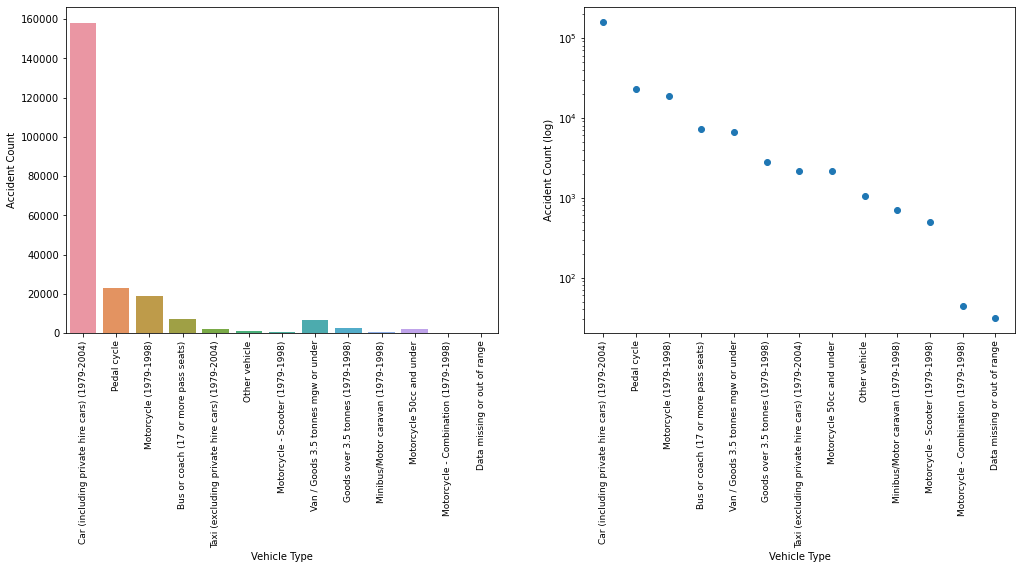

In [9]:
plt.figure(figsize=(17, 6))

plt.subplot(1, 2, 1)
plt.xticks(rotation=90, fontsize=9)
sns.countplot(ds_new.vehicle_type_label)
plt.ylabel('Accident Count')
plt.xlabel('Vehicle Type')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90, fontsize=9)
plt.semilogy(ds_new.vehicle_type_label.value_counts(),'o')
plt.xlabel('Vehicle Type')
plt.ylabel('Accident Count (log)')

## Which vehicle type representing the most number of casualties?

In [10]:
result2 = ds_new.groupby('vehicle_type_label').number_of_casualties.sum().sort_values(ascending=False)
result2

vehicle_type_label
Car (including private hire cars) (1979-2004)     217810
Pedal cycle                                        23707
Motorcycle (1979-1998)                             20892
Van / Goods 3.5 tonnes mgw or under                 8780
Bus or coach (17 or more pass seats)                8621
Goods over 3.5 tonnes (1979-1998)                   3688
Taxi (excluding private hire cars) (1979-2004)      2795
Motorcycle 50cc and under                           2245
Other vehicle                                       1377
Minibus/Motor caravan (1979-1998)                    990
Motorcycle - Scooter (1979-1998)                     539
Motorcycle - Combination (1979-1998)                  47
Data missing or out of range                          32
Name: number_of_casualties, dtype: int64

c:\Users\dahom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Vehicle Type')

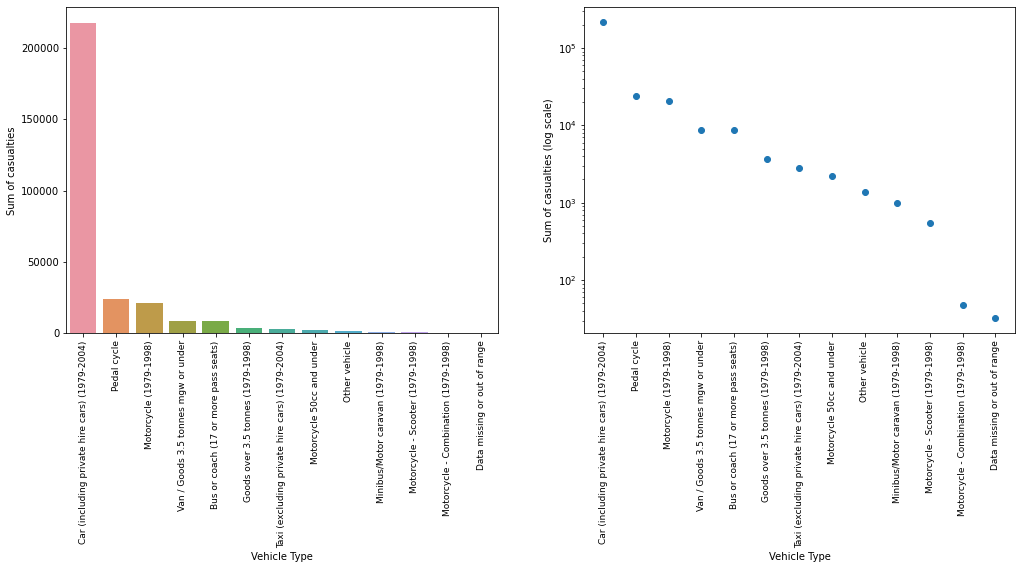

In [11]:
plt.figure(figsize=(17, 6))

plt.subplot(1, 2, 1)
plt.xticks(rotation=90, fontsize=9)
sns.barplot(result2.index, result2.values)
plt.xlabel("Vehicle Type")
plt.ylabel("Sum of casualties")

plt.subplot(1, 2, 2)
plt.xticks(rotation=90, fontsize=9)
plt.semilogy(result2,'o')
plt.ylabel("Sum of casualties (log scale)")
plt.xlabel("Vehicle Type")
